# Movie Revenue Prediction

In [12]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

### Load Dataset & Reshape

In [2]:
path = r'..\data\tmbd_movie_dataset.csv'
dataset = pd.read_csv(path)


movie_data = dataset.drop(columns=[
    'id', 'imdb_id', 'original_title', 'cast', 'director',
    'tagline', 'overview', 'keywords', 'genres',
    'production_companies', 'popularity_level'
])

### Log Transform

In [3]:
movie_data['log_budget'] = np.log1p(movie_data['budget'])
movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

In [6]:
X, y = movie_data[['log_budget', 'popularity']].values, movie_data['log_revenue'].values

### Test visualization

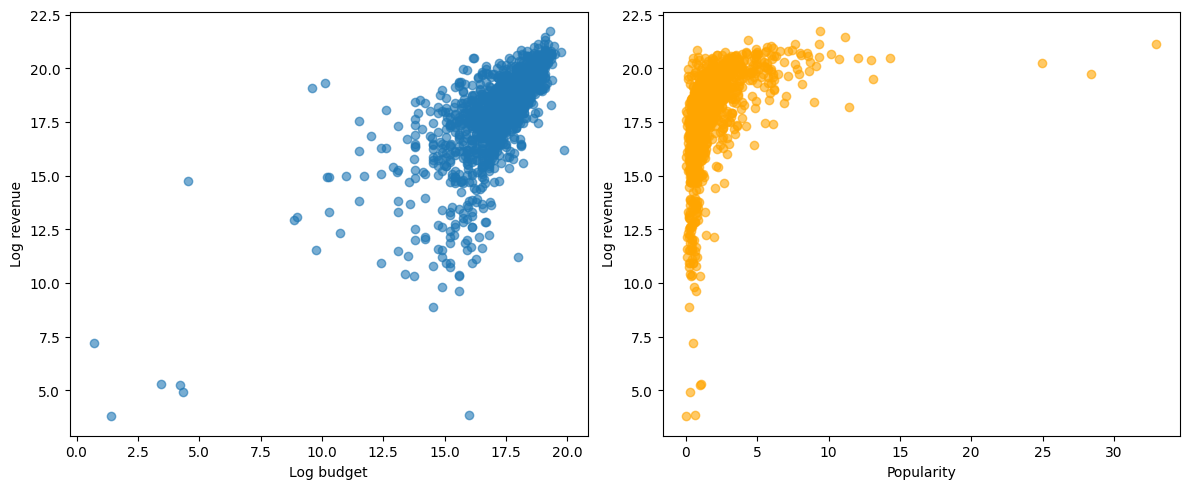

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], y, alpha=0.6)
ax[0].set_xlabel('Log budget')
ax[0].set_ylabel('Log revenue')

ax[1].scatter(X[:, 1], y, alpha=0.6, color='orange')
ax[1].set_xlabel('Popularity') 
ax[1].set_ylabel('Log revenue')

plt.tight_layout()
plt.show()